In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import colormaps
import cv2
import os

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('ggplot')

cmap = colormaps["gray"]
width = 28

In [19]:
x, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)
N = min(2000, len(x))
x = x[:N]
y = y[:N]
x = x / 255

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(list(map(len, [x_train, x_test, y_train, y_test])))

svc = SVC()
svc = svc.fit(x_train, y_train)

y_predicted = svc.predict(x_test)
score = accuracy_score(y_test, y_predicted)

print(f"{score = }")

[1500, 500, 1500, 500]
score = 0.93


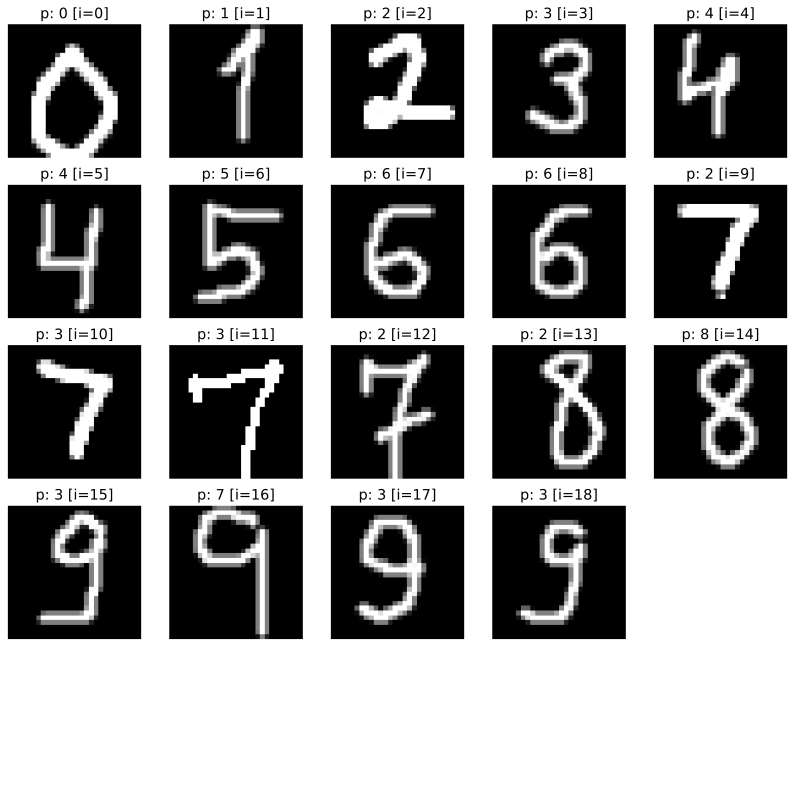

In [25]:
pics_path = os.scandir("./pics")


def prepare(pic_path):
    # image = Image.open(pic_path)
    image = cv2.imread(pic_path, cv2.IMREAD_GRAYSCALE)
    return np.array(image).flatten() / 255.


images = np.array(list(map(prepare, pics_path)))
image_preds = svc.predict(images)

rows, cols = 5, 5

fig, axs = plt.subplots(rows, cols)
for i in range(min(rows * cols, len(image_preds))):
    pic = np.resize(images[i], (width, width))
    this_axs = axs[i // rows, i % cols]
    this_axs.imshow(pic, cmap=cmap)
    this_axs.set_title(f"p: {image_preds[i]} [{i=}]")

for i in range(rows * cols):
    axs[i // rows, i % cols].axis('off')

fig.set_size_inches(14, 14)
plt.autoscale()
plt.show()
